# Fashion-MNIST overview
This document goes through the analysis across the range of initial conditions (with no noise). Because figures in this paper covered two datasets, most of the graphs generated here are only a portion of the complete figure, and the remaining portions are found in other notebooks.

In [1]:
from analysisUtil import *
import pandas as pd
import random
import matplotlib.colors
from scipy import stats
df = pd.read_csv('combinedData_final.csv')

In [2]:
col = df.columns
for i in range(25):
    print(f"{col[i]}:\t{df[col[i]][0]}")

Unnamed: 0:	0
version:	1.0
simTag:	sparse050_10class_100_t0
nb_inputs:	784
nb_hidden:	100
excHidRat:	0.5
nb_outputs:	10
time_step:	0.001
nb_steps:	100
batch_size:	256
nb_epochs:	30
lr:	0.01
tau_mem:	0.01
tau_syn:	0.005
alpha:	0.8187307530779818
beta:	0.9048374180359596
sparse_w1:	True
sparse_w2:	False
sparsity_w1:	0.0
sparsity_w2:	0.0
std_w1:	0.0005
std_w2:	0.0
TP_e-1_c0:	999.0
TN_e-1_c0:	0.0
FP_e-1_c0:	8985.0


In [3]:
std_w1 = df['batch_size'].unique()
std_w1.sort()
print(std_w1)

[256]


# Full SparseXXX_10class Analysis (Fig 3 col2-5)
This dataset is generated using the `generateCSV.py` script. Make sure to have the HTML files for the data into the `./reportsHTML` directory and the surrParam files into the `./sparseAll_10class_surrParams` directory.

This script focuses on the data analysis in a clear format. See the `analysisUtils.py` script for helper functions.

The Dataset includes the following key parameters we will be analyzing and comparing:
- Training parameters
  - E-I ratio
  - Weight initialization
  - etc.
- Accuracy and Loss (across training, including True Positive, False Positive, etc.)
- Exc and Inh Activity (Raw and Normalized on a per class basis)
- Van Rossum Distance

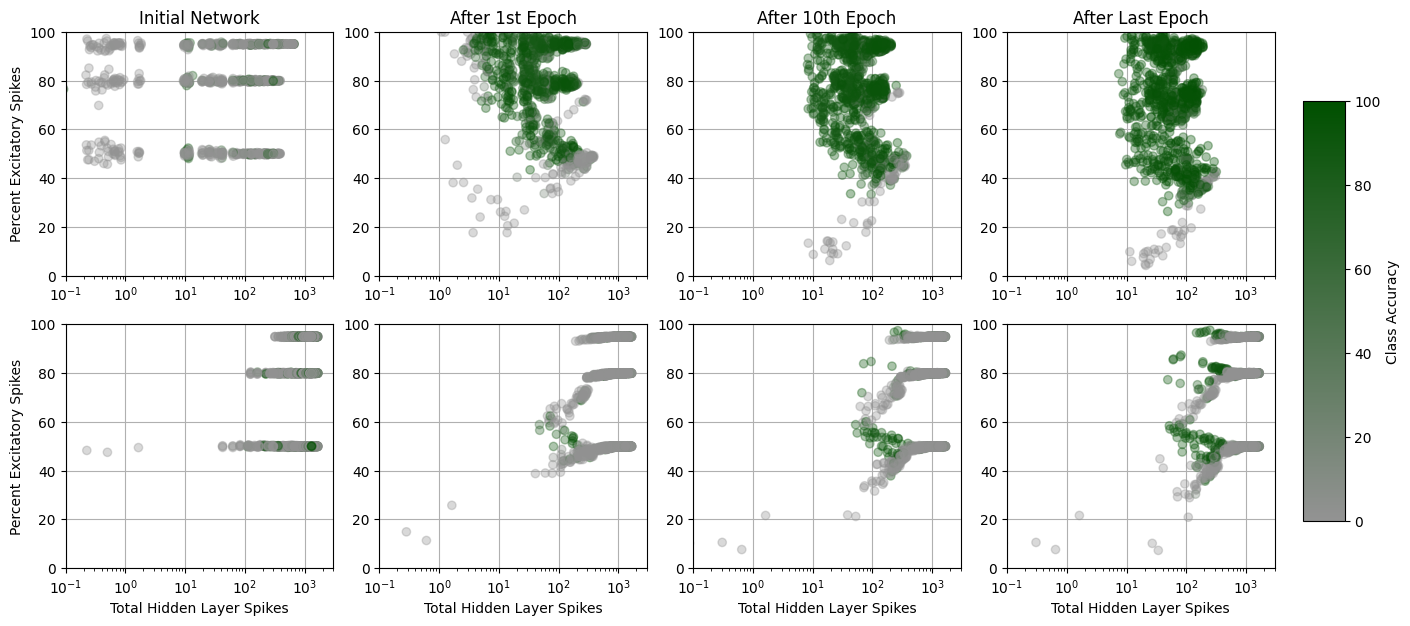

In [4]:
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#808080","#D3A5A5", '#D3A5A5']) # grey to pink
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#808080","#B0C4DE", '#0000FF']) # grey to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#939393", '#005000']) # grey to green
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#D3D3D3","#FFC0CB", '#FF69B4']) # light grey to dark pink
#cmap='viridis_r'
fig, axs = plt.subplots(2, 4, figsize=(14,6))
for e in [-1,0,9,29]:
    column=0
    if e==0: column=1
    elif e==9: column=2
    elif e==29: column=3
    
    xSuccess = []
    ySuccess = []
    colorSuccess = []
    xFailure = []
    yFailure = []
    colorFailure = []
    for c in range(10):
        for i in range(len(df)):    
            if(df['excHidRat'].values[i] ==1.0): continue
            tpTag = 'TP_e'+str(e)+'_c'+str(c)
            TP = df[tpTag].values[i]

            fnTag = 'FN_e'+str(e)+'_c'+str(c)
            FN = df[fnTag].values[i]

            excTag = 'excActAvg_e'+str(e)+'_c'+str(c)
            exc = df[excTag].values[i]

            inhTag = 'inhActAvg_e'+str(e)+'_c'+str(c)
            inh = df[inhTag].values[i]
            
            if(df['maxAcc'].values[i]>=0.5):
                ySuccess.append(exc/(exc+inh))
                xSuccess.append(exc+inh)
                colorSuccess.append(TP/(TP+FN))
            else:
                yFailure.append(exc/(exc+inh))
                xFailure.append(exc+inh)
                colorFailure.append(TP/(TP+FN))

    axs[0][column].scatter(xSuccess,[t*100 for t in ySuccess],c=[t*100 for t in colorSuccess], cmap=cmap, alpha=0.35)
    sc = axs[1][column].scatter(xFailure,[t*100 for t in yFailure],c=[t*100 for t in colorFailure], cmap=cmap, alpha=0.35)

    for i in range(2):
        axs[i][column].set_ylim(0,100)
        axs[i][column].set_xlim(0.1, 3000)
        axs[i][column].set_xscale('log')
        axs[i][column].tick_params(axis='x', which='minor', bottom=True)
        axs[i][column].grid()
        axs[i][column].set_axisbelow(True)
        
plt.tight_layout()

axs[0][0].set_ylabel('Percent Excitatory Spikes')
axs[1][0].set_ylabel('Percent Excitatory Spikes')
axs[1][0].set_xlabel('Total Hidden Layer Spikes')
axs[1][1].set_xlabel('Total Hidden Layer Spikes')
axs[1][2].set_xlabel('Total Hidden Layer Spikes')
axs[1][3].set_xlabel('Total Hidden Layer Spikes')

axs[0][0].set_title('Initial Network')
axs[0][1].set_title('After 1st Epoch')
axs[0][2].set_title('After 10th Epoch')
axs[0][3].set_title('After Last Epoch')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax, label='Class Accuracy')
cb.solids.set(alpha=1)
# plt.colorbar(sc)

#     plt.grid()
#     plt.colorbar(label='Class Accuracy')
#     plt.xlim(0.1,3000)
#     plt.ylabel('Percent Excitatory Activity')
#     plt.ylim(0,100)
#     plt.xscale('log')
#     plt.xlabel('Avg Hidden Layer Spikes Per Image')
    #plt.title('Epoch '+str(e))
#     axs.set_axisbelow(True)
plt.savefig('./act_exc_rat_acc_figure/act_acc_all_V12_SR.svg',bbox_inches="tight")

In [5]:
clearTmpDirectory() # clear tmp folder for plots

for e in range(-1,30):
    fig, axs = plt.subplots(2, 1, figsize=(4,6))
    xSuccess = []
    ySuccess = []
    colorSuccess = []
    xFailure = []
    yFailure = []
    colorFailure = []
    for c in range(10):
        for i in range(len(df)):    
            if(df['excHidRat'].values[i] ==1.0): continue
            tpTag = 'TP_e'+str(e)+'_c'+str(c)
            TP = df[tpTag].values[i]

            fnTag = 'FN_e'+str(e)+'_c'+str(c)
            FN = df[fnTag].values[i]

            excTag = 'excActAvg_e'+str(e)+'_c'+str(c)
            exc = df[excTag].values[i]

            inhTag = 'inhActAvg_e'+str(e)+'_c'+str(c)
            inh = df[inhTag].values[i]
            
            if(df['maxAcc'].values[i]>=0.5):
                ySuccess.append(exc/(exc+inh))
                xSuccess.append(exc+inh)
                colorSuccess.append(TP/(TP+FN))
            else:
                yFailure.append(exc/(exc+inh))
                xFailure.append(exc+inh)
                colorFailure.append(TP/(TP+FN))

    axs[0].scatter(xSuccess,[t*100 for t in ySuccess],c=[t*100 for t in colorSuccess], cmap=cmap, alpha=0.35)
    sc = axs[1].scatter(xFailure,[t*100 for t in yFailure],c=[t*100 for t in colorFailure], cmap=cmap, alpha=0.35)

    for i in range(2):
        axs[i].set_ylim(0,100)
        axs[i].set_xlim(0.1, 3000)
        axs[i].set_xscale('log')
        axs[i].tick_params(axis='x', which='minor', bottom=True)
        axs[i].grid()
        axs[i].set_axisbelow(True)
        
    plt.tight_layout()

    axs[0].set_ylabel('Percent Excitatory Spikes')
    axs[1].set_ylabel('Percent Excitatory Spikes')
    axs[1].set_xlabel('Total Hidden Layer Spikes')
    axs[0].set_title('Epoch '+str(e))
    
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
    cb = fig.colorbar(sc, cax=cbar_ax, label='Class Accuracy')
    cb.solids.set(alpha=1)
    plt.savefig('./tmp/{:03d}.jpg'.format(e+1), bbox_inches="tight", dpi=300)
    plt.clf()
    plt.close()
    
generateTmpGIF(outputFile='all_act_vs_exc_rat_V02_SR')

MoviePy - Building file all_act_vs_exc_rat_V02_SR.gif with imageio.


# Van Rossum Distance (Fig 5a-c)

In [6]:
df = pd.read_csv('combinedData_VRD_fix.csv')

RATIO: 0.5
INIT E-E MED: 1.2910286697345497
INIT I-I MED: 1.2780173659917584
INIT E-I MED: 1.2827785395899132
SUCCESS E-E MED: 0.7731205794462443
SUCCESS I-I MED: 1.079297774961209
SUCCESS E-I MED: 0.9918989475152904
FAILURE E-E MED: 1.45689637531561
FAILURE I-I MED: 1.4459100654762573
FAILURE E-I MED: 1.5399668382416973
init acc: 9.8283(141)	 success acc: 68.9203(32)	 failure acc: 15.4069(109)
Epoch 29 Initi	p-value: 0.992098
Epoch 29 Success	p-value: 0.009136
Epoch 29 Failure	p-value: 0.226031
RATIO: 0.8
INIT E-E MED: 1.2965565151986014
INIT I-I MED: 1.2874724176480266
INIT E-I MED: 1.2885644787486388
SUCCESS E-E MED: 0.890288896081716
SUCCESS I-I MED: 1.0995514975895673
SUCCESS E-I MED: 1.0252114677911752
FAILURE E-E MED: 1.5319179029171905
FAILURE I-I MED: 1.5531411573778917
FAILURE E-I MED: 1.625723869703414
init acc: 9.9259(145)	 success acc: 80.7148(41)	 failure acc: 15.0337(104)
Epoch 29 Initi	p-value: 0.995396
Epoch 29 Success	p-value: 0.000000
Epoch 29 Failure	p-value: 0.0880

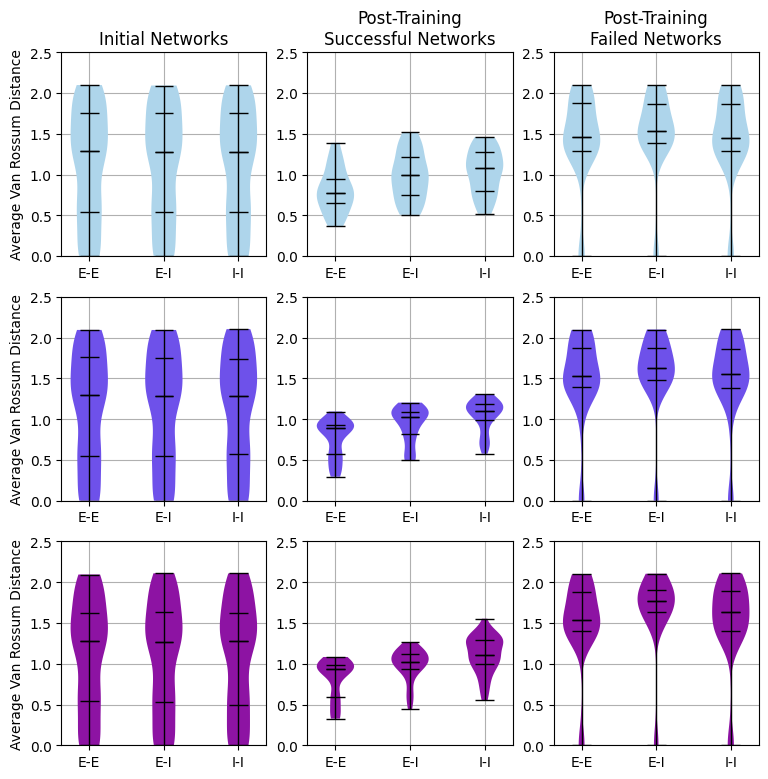

In [7]:
from scipy.stats import kruskal
from statistics import median

excHidRat = [0.5, 0.8, 0.95]

colorDefs = {0.5:'#F1C40F',
            0.8:'#ED7D31',
            0.95:'#A93226',
            1.0:'#6A1B9A'}

colorDefs = {
    0.50: '#E6CCFF',  # light lavender
    0.70: '#CC99FF',  # lavender
    0.75: '#B366FF',  # rich lavender
    0.80: '#9933FF',  # dark lavender
    0.90: '#8000FF',  # deep lavender
    0.95: '#6600CC', # dark purple
    1.00: '#000000'   # Black
}

colorDefs ={
1.00:'#000000',
 .95:'#8D13A3',
 .90:'#7C2ED1',
 .80:'#6E51EA',
 .75:'#727CE8',
 .70:'#91B1E8',
 .50:'#AED5EB'
}

def calcFix(d):
    # the distance code was incorrectly written and attempted
    #  to be fixed at a later time
    #  in fixing, a chunk of the previous code was left
    #   which multiplied the value by a decay factor, and took the sqrt
    #  additionally, the calculation forgot to divide by the number
    #  of batches (233) in the training data
    # this method fixes that calculation
    return d*d*0.5/233

fig, axs = plt.subplots(3, 3, figsize=(9,9))
for ratio in range(len(excHidRat)):
    yEE_init = []
    yEI_init = []
    yII_init = []
    yEE_success = []
    yEI_success = []
    yII_success = []
    yEE_failure = []
    yEI_failure = []
    yII_failure = []
    acc_init = []
    acc_success = []
    acc_failure = []
    for e in [-1,29]:
        
        color = []
        #accList = []
        for i in range(len(df)):
            #if(df['maxAcc'].values[i] <= 0.5): continue
            if(df['excHidRat'].values[i] != excHidRat[ratio]): continue
            #accList.append(df['maxAcc'].values[i])
            eeTag = 'e-e_avg_e'+str(e)
            ee = calcFix(df[eeTag].values[i])

            eiTag = 'e-i_avg_e'+str(e)
            ei = calcFix(df[eiTag].values[i])

            iiTag = 'i-i_avg_e'+str(e)
            ii = calcFix(df[iiTag].values[i])
            
            correct = 0
            for c in range(10):
                TP = df['TP_e'+str(e)+'_c'+str(c)].values[i]
                FN = df['FN_e'+str(e)+'_c'+str(c)].values[i]
                TN = df['TN_e'+str(e)+'_c'+str(c)].values[i]
                FP = df['FP_e'+str(e)+'_c'+str(c)].values[i]
                correct+=TP
            total=TP+FN+TN+FP
            
            if e==-1:
                yEE_init.append(ee)
                yEI_init.append(ei)
                yII_init.append(ii)
                acc_init.append((correct/total)*100)
            elif df['maxAcc'].values[i] > 0.5:
                yEE_success.append(ee)
                yEI_success.append(ei)
                yII_success.append(ii)
                acc_success.append((correct/total)*100)
            else:
                yEE_failure.append(ee)
                yEI_failure.append(ei)
                yII_failure.append(ii)
                acc_failure.append((correct/total)*100)
    print('RATIO: '+str(excHidRat[ratio]))
    print('INIT E-E MED: '+str(median(yEE_init)))
    print('INIT I-I MED: '+str(median(yII_init)))
    print('INIT E-I MED: '+str(median(yEI_init)))
    print('SUCCESS E-E MED: '+str(median(yEE_success)))
    print('SUCCESS I-I MED: '+str(median(yII_success)))
    print('SUCCESS E-I MED: '+str(median(yEI_success)))
    print('FAILURE E-E MED: '+str(median(yEE_failure)))
    print('FAILURE I-I MED: '+str(median(yII_failure)))
    print('FAILURE E-I MED: '+str(median(yEI_failure)))
    print(f'init acc: {sum(acc_init)/len(acc_init):.04f}({len(acc_init):d})\t success acc: {sum(acc_success)/len(acc_success):.04f}({len(acc_success):d})\t failure acc: {sum(acc_failure)/len(acc_failure):.04f}({len(acc_failure):d})')
    statistic, p_value = kruskal(yEE_init, yEI_init, yII_init)
    print('Epoch {:02d} Initi\tp-value: {:f}'.format(e,p_value))
    statistic, p_value = kruskal(yEE_success, yEI_success, yII_success)
    print('Epoch {:02d} Success\tp-value: {:f}'.format(e,p_value))
    statistic, p_value = kruskal(yEE_failure, yEI_failure, yII_failure)
    print('Epoch {:02d} Failure\tp-value: {:f}'.format(e,p_value))

    parts = axs[ratio][0].violinplot([yEE_init,yEI_init,yII_init], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(colorDefs[excHidRat[ratio]])
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    parts = axs[ratio][1].violinplot([yEE_success,yEI_success,yII_success], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(colorDefs[excHidRat[ratio]])
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    parts = axs[ratio][2].violinplot([yEE_failure,yEI_failure,yII_failure], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(colorDefs[excHidRat[ratio]])
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
            
            
for i in range(3):
    for j in range(3):
        axs[i][j].set_ylim(0,2.5)
        axs[i][j].set_xticks(ticks=[1, 2, 3], labels=['E-E', 'E-I', 'I-I'])
        axs[i][j].grid(True)
        axs[i][j].set_axisbelow(True)
    axs[i][0].set_ylabel('Average Van Rossum Distance')
axs[0][0].set_title('Initial Networks')
axs[0][1].set_title('Post-Training\nSuccessful Networks')
axs[0][2].set_title('Post-Training\nFailed Networks')

plt.savefig('./van_rossum_stats_plots/pre_and_post_allV06_SR.svg', bbox_inches='tight')
#         plt.xticks(ticks=[1, 2, 3], labels=['E-E', 'E-I', 'I-I'])
#         plt.ylim(0,850)
#         plt.ylabel('Van Rossum Distance')
#         plt.title('EI={:.02f}, epoch={:02d}, p-val={:.06f}\nN={:d}, acc={:03f}'.format(excHidRat[ratio], e, p_value,len(yEE), avgAcc))
#         plt.grid(True)
#         axs.set_axisbelow(True)
#         plt.savefig('./van_rossum_stats_plots/EI-{:.02f}_epoch{:02d}.svg'.format(excHidRat[ratio],e),bbox_inches='tight')
#         plt.show()

# Full Activity vs. Accuracy (Fig 1c)

In [8]:
df = pd.read_csv('combinedData_final.csv')
df['excHidRat'].unique()

array([0.5 , 0.8 , 0.95, 1.  ])

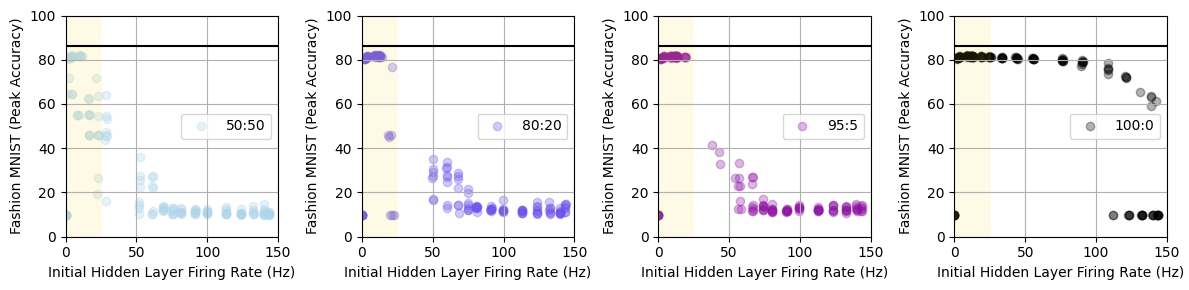

In [9]:
plotNum=0
colorDefs = {
1.00:'#000000',
 .95:'#8D13A3',
 .90:'#7C2ED1',
 .80:'#6E51EA',
 .75:'#727CE8',
 .70:'#91B1E8',
 .50:'#AED5EB'
}
fig, axs = plt.subplots(1, 4, figsize=(12,3))
for e in [0.5, 0.8, 0.95, 1.0]:
    x=[]
    y=[]
    for i in range(len(df)):
        if df['excHidRat'].values[i]!=e: continue
        y.append(df['maxAcc'].values[i])
        
        totalAct = 0 
        for c in range(10):
            excTag = 'excActAvg_e0_c'+str(c)
            exc = df[excTag].values[i]

            inhTag = 'inhActAvg_e0_c'+str(c)
            inh = df[inhTag].values[i]
            totalAct+= exc+inh
        totalAct = totalAct/10
            
        x.append(totalAct/100 / 0.1) # change to frequency (since trials last 0.1s)

    
    axs[plotNum].scatter(x,[t*100 for t in y], color=colorDefs[e], alpha=0.3, label='{:d}:{:d}'.format(int(e*100),100-int(e*100)))
    axs[plotNum].set_ylim(0,100)
    axs[plotNum].set_xlim(0,150)
    axs[plotNum].axvspan(0, 25.6, color='gold', alpha=0.1, lw=0)
    axs[plotNum].grid()
    axs[plotNum].legend()
    axs[plotNum].set_ylabel('Fashion MNIST (Peak Accuracy)')
    axs[plotNum].set_xlabel('Initial Hidden Layer Firing Rate (Hz)')
    axs[plotNum].plot([0,150],[86,86], color='black')
    plotNum+=1
    
plt.tight_layout()
plt.savefig('./FMNIST_acc/freq_accV07_SR.svg', bbox_inches='tight')

# Accuracy Convergence Curves (Fig 3 col1)

In [10]:
greyscale_dict = {
    0.0005: '#404040',
    0.00075:'#464646',
    0.001:  '#4D4D4D',
    0.002:  '#535353',
    0.003:  '#5A5A5A',
    0.004:  '#606060',
    0.005:  '#666666',
    0.01:   '#6D6D6D',
    0.0125: '#737373',
    0.015:  '#7A7A7A',
    0.0175: '#808080',
    0.02:   '#878787',
    0.025:  '#8F8F8F',
    0.03:   '#969696',
    0.04:   '#9D9D9D',
    0.05:   '#A5A5A5',
    0.06:   '#ACACAC',
    0.07:   '#B3B3B3',
    0.075:  '#BABABA'
}

color_dict = {
    0.0005: '#581858',
    0.00075:'#5F1C58',
    0.001:  '#662158',
    0.002:  '#6C2557',
    0.003:  '#722B56',
    0.004:  '#783054',
    0.005:  '#7D3652',
    0.01:   '#833C51',
    0.0125: '#874250',
    0.015:  '#8C4950',
    0.0175: '#905050',
    0.02:   '#9B575B',
    0.025:  '#A55F68',
    0.03:   '#AF6775',
    0.04:   '#B87082',
    0.05:   '#C0798F',
    0.06:   '#C9839D',
    0.07:   '#D08DAA',
    0.075:  '#D898B8'
}

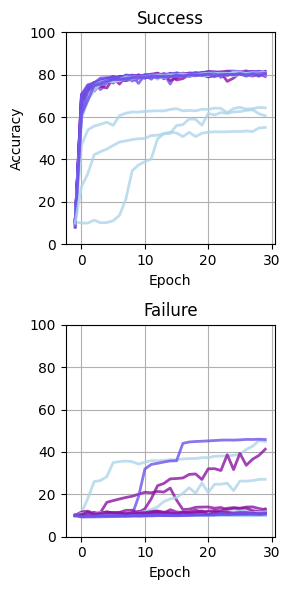

<Figure size 640x480 with 0 Axes>

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(3,6))
flags = {0:{0.5:0, 0.8:0, 0.95:0},  # success flags
        1:{0.5:0, 0.8:0, 0.95:0}}   # failure flags

import random
indices = list(range(len(df)))
random.shuffle(indices)
for i in indices:
    excHidRat = df['excHidRat'].values[i]
    if excHidRat == 1.0 : continue
    acc = []
    
    for e in range(-1,30):
        correct = 0
        total = 0
        for c in range(10):
            TP = df['TP_e'+str(e)+'_c'+str(c)].values[i]
            FN = df['FN_e'+str(e)+'_c'+str(c)].values[i]
            TN = df['TN_e'+str(e)+'_c'+str(c)].values[i]
            FP = df['FP_e'+str(e)+'_c'+str(c)].values[i]
            correct+=TP
        total+=TP+FN+TN+FP
        acc.append((correct/total) *100)
    
    pltIndex = 1 if max(acc)<50 else 0

    if flags[pltIndex][excHidRat]>6:
        continue
    
    flags[pltIndex][excHidRat] += 1
    axs[pltIndex].plot(range(-1,30), acc, color=colorDefs[excHidRat], linewidth=2, alpha=0.8, label=str(excHidRat*100))

for i in range(2):
    axs[i].set_ylim(0,100)
    axs[i].set_xlabel('Epoch')
    axs[i].grid()
    axs[i].set_axisbelow(True)

axs[0].set_ylabel('Accuracy')
axs[0].set_title('Success')
axs[1].set_title('Failure')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()
plt.savefig('./act_exc_rat_acc_figure/random_acc_no_legend_V01_SR.svg',bbox_inches="tight")